# ** Customer_Churn_Analysis ** #

# Step_2: Setting up the Environment and Import libraries #

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step_3: Load and Preview the dataset

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

# Step_4: Data Exploraiton

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe() #View basic statistics

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True) #Converting TotalCharges column to numeric

C:\Users\User\AppData\Local\Temp\ipykernel_3992\1531386445.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True) #Converting TotalCharges column to numeric


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df['Churn'].value_counts(normalize=True)* 100 #Understanding class distribution

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

# Step_5: Data Pre_processing

In [16]:
# dropping unncessary columns

df.drop('customerID', inplace = True)

KeyError: "['customerID'] not found in axis"

In [27]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [29]:
# Convert target column "Churn" to binary
df['Churn']= df['Churn'].map({'No':0, "Yes":1})

In [33]:
#Encode categorical variables
#from sklearn.preprocessing import LabelEncoder

#Label encode binary categorical columns
binary_cols=['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
le=LabelEncoder()

for col in binary_cols:
    df[col]=le.fit_transform(df[col])

In [35]:
# One hot encode other categorical variables

df=pd.get_dummies(df,drop_first=True)

In [37]:
# Scale numerical columns
# from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [39]:
df = df.dropna(subset=['Churn'])

In [41]:
# Split the data

x = df.drop('Churn', axis=1)
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Step_6: EDA

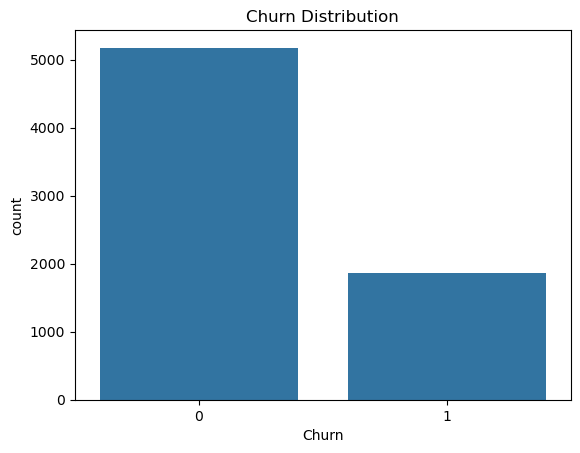

In [43]:
#1. Churn Rate Overview


sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.xticks([0,1]), ["No Churn", "Churn"]
plt.show()

In [45]:
# Churn percentage
Churn_rate =df["Churn"].value_counts(normalize=True)[1] * 100
print(f"Overall Churn Rate: {Churn_rate: .2f}%")

Overall Churn Rate:  26.54%


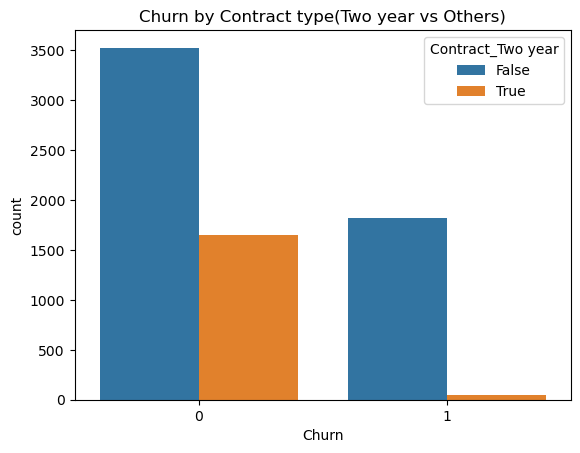

In [47]:
#2. Churn vs Contract Type

sns.countplot(x="Churn", hue="Contract_Two year", data=df)
plt.title("Churn by Contract type(Two year vs Others)")
plt.show()

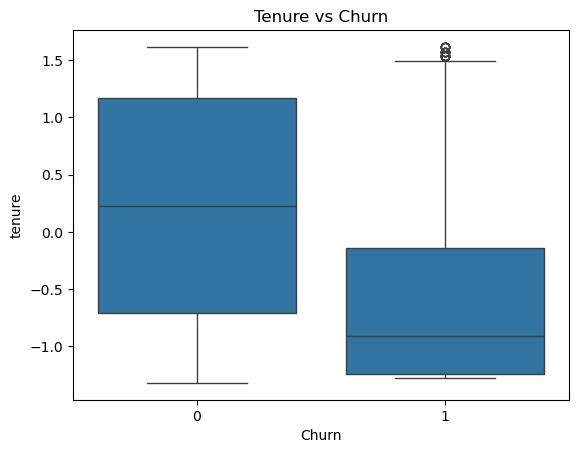

In [49]:
#3. Tenure vs Churn

sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

# Step 7: Feature Selection and Model Training

In [51]:
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
rf_pred= rf.predict(x_test)
print("Random Forest Accuracy", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy 0.7998580553584103
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.68      0.47      0.56       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [59]:
"""

📌 Key Insights:
✅ High Accuracy (80%) — but mostly because the model performs well on the dominant class (No Churn).

⚠️ Churn prediction is weaker (Recall = 47%) — you’re missing more than half of the actual churners.

📉 Imbalanced performance — suggests that your dataset may be imbalanced, with more non-churn cases.

🛠️ Improvement Needed:

Consider using SMOTE or class weights to handle imbalance.

Try other models like XGBoost or ensemble techniques.

Tune hyperparameters for better recall on churned customers. """

'\n\n📌 Key Insights:\n✅ High Accuracy (80%) — but mostly because the model performs well on the dominant class (No Churn).\n\n⚠️ Churn prediction is weaker (Recall = 47%) — you’re missing more than half of the actual churners.\n\n📉 Imbalanced performance — suggests that your dataset may be imbalanced, with more non-churn cases.\n\n🛠️ Improvement Needed:\n\nConsider using SMOTE or class weights to handle imbalance.\n\nTry other models like XGBoost or ensemble techniques.\n\nTune hyperparameters for better recall on churned customers. '